In [1023]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

In [1024]:
# Установка начальных параметров
random.seed(42)  # Зафиксируем seed для воспроизводимости результатов
np.random.seed(42)
num_samples = 3000  # Количество записей
start_date = datetime(2023, 1, 1)  # Начальная дата
work_hours_start = 9  # Начало рабочего дня
work_hours_end = 17  # Конец рабочего дня
time_to_read = 4  # Часы до прочтения
stress_keywords = ['stress', 'deadline', 'overwork']  # Ключевые слова для стресса
salary_change_keywords = ['salary', 'pay raise', 'compensation']  # Ключевые слова про изменение зарплаты
vacation_keywords = ['vacation', 'leave', 'time off']  # Ключевые слова про отпуск

# Генерация последовательных ID
starting_id = 1000  # Начальное значение ID
num_users = num_samples  # Количество пользователей

user_ids = [starting_id + i for i in range(num_users)]

In [1025]:
# Генерация чисел в пропорциях 80% и 20%
percent_greater_than_05 = 0.25  # Процент чисел больше 0.5

# Создание массива чисел от 0 до 1
numbers = np.random.rand(num_samples)

# Определение количества чисел больше и меньше 0.5
num_greater_than_05 = int(num_samples * percent_greater_than_05)
num_less_than_05 = num_samples - num_greater_than_05

# Установка значений
numbers[num_greater_than_05:] *= 0.5  # Уменьшение чисел, начиная с определенного индекса

# Пример значений
print(numbers)

# Целевая переменная
resigned = numbers

[0.37454012 0.95071431 0.73199394 ... 0.15489393 0.14502277 0.43570702]


In [1026]:
# Общее количество сообщений
sent_messages = np.int32(10 + np.random.poisson(50, num_samples) * (0.57 * resigned + np.random.choice([0, 1], num_samples))) # Количество отправленных сообщений за период
received_messages = 50 +  np.int32(0.23 * sent_messages + np.random.poisson(40, num_samples) * (0.57 * resigned + np.random.choice([0, 1], num_samples) )) # Количество полученных сообщений за период
messages_outside_work_hours = np.int32(sent_messages * 0.13 * np.random.choice([0, 1], num_samples, p=[0.6, 0.4]) + sent_messages/max(sent_messages)) # Количество сообщений, отправленных вне рабочего дня
send_frequency = np.int32(sent_messages * 0.07 + np.random.poisson(10, num_samples) + messages_outside_work_hours/max(messages_outside_work_hours)) # Частота отправки писем за период
receive_frequency = np.int32(received_messages * 0.04 + np.random.normal(30, 5, num_samples)+ messages_outside_work_hours/max(messages_outside_work_hours)) # Частота получения писем за период
sent_received_ratio = received_messages / (sent_messages + 1) # Соотношение количества полученных и отправленных сообщений

In [1027]:
# Характеристики сообщений
recipients_in_sent = np.int32(0.04 * sent_messages + np.random.poisson(5, num_samples)) # Количество адресатов в отправляемых сообщениях
hidden_copy  = np.int32(0.9 * recipients_in_sent * np.random.exponential(0.4, num_samples) + sent_messages/max(sent_messages)) # Количество сообщений с адресатами в поле "скрытая копия"
carbon_copy  = np.int32(0.3 * recipients_in_sent * np.random.exponential(0.5, num_samples) + sent_messages/max(sent_messages) + hidden_copy/max(hidden_copy)) # Количество сообщений с адресатами в поле "копия"
text_length = np.int32(np.log(sent_messages + 1) * np.random.lognormal(3, 1, num_samples) + 0.7 * received_messages) # Количество символов текста в исходящих сообщениях
bytes_ratio = 0.03 * sent_received_ratio +  np.random.uniform(0.5, 2.0, num_samples)  # Соотношение объема в байтах получаемых и отправляемых сообщений
question_marks = np.int32(1 * 5 * text_length/max(text_length) * np.random.exponential(3, num_samples)) # Количество входящих сообщений с вопросительными знаками, на которые не был направлен ответ

In [1028]:
# Ответы и реакции
answered_messages = np.int32(np.random.normal(20, 5, num_samples) + 10 * sent_messages/max(sent_messages)) #  Количество сообщений, на которые произведен ответ
unanswered_messages = np.int32(np.random.uniform(0, 5, num_samples) * sent_messages * 0.01)  # Количество сообщений, на которые сотрудник не получил ответа
unreplied_messages = np.int32(np.random.uniform(0, 5, num_samples) + 3.5 * received_messages/max(received_messages) + 2.1 * sent_messages/max(sent_messages) - 3.3 * answered_messages/max(answered_messages))  # Количество сообщений, на которые сотрудник сам не ответил

In [1029]:
# Типы взаимодействий и эмоции
mention_colleagues = (np.random.poisson(3, num_samples) * np.random.choice([0, 1], num_samples) + (2.3 * sent_messages + 1.8 * received_messages)/max(received_messages)) * (0.23 * resigned + np.random.choice([0, 1], num_samples) ) # Частота упоминания коллег в письмах
salary_change_info = np.random.choice([0, 1], num_samples) * (0.79 * resigned + np.random.choice([0, 1], num_samples) )  # Указание информации о изменении зарплаты
vacation_info =  np.random.binomial(1, 0.7, num_samples) * (0.48 * resigned + np.random.choice([0, 1], num_samples) ) # Указание информации об отпуске
polite_message = np.random.binomial(1, 0.3, num_samples) * (0.11 * resigned + np.random.choice([0, 1], num_samples) ) # Является ли сообщение вежливым
mood_type =  np.random.binomial(1, 0.37, num_samples) * (0.37 * resigned + np.random.choice([0, 1], num_samples) ) # Настроение в сообщении
stress_keywords =  np.random.binomial(1, 0.3, num_samples) * (0.29 * resigned + np.random.choice([0, 1], num_samples) ) # Есть ли стрессовые слова в сообщении?

In [1030]:
# Временные характеристики
response_time = np.int32((np.random.normal(0.3, 0.5, num_samples) + 0.15 * sent_messages + 0.22 * received_messages +  0.15 *mood_type +  0.15 * stress_keywords +  0.15 * vacation_info +  0.15 * salary_change_info  +  0.15 * mention_colleagues )* np.random.uniform(0, 0.3, num_samples)) # Среднее время ответа на входящие сообщения
late_read_messages = np.int32(np.random.normal(2, 1, num_samples) + np.random.uniform(-1, 1, num_samples) + 0.03 * received_messages) # Количество сообщений, прочитанных позднее времени получения на 4 часа
days_between_received_read = np.int32((np.random.exponential(2, num_samples) + np.random.uniform(0, 1, num_samples) * 0.5*response_time + late_read_messages + 0.27 * received_messages + mood_type + stress_keywords + vacation_info + salary_change_info  + mention_colleagues) * np.random.uniform(0, 0.1, num_samples)) # Количество дней между датой получения и датой прочтения сообщения

In [1031]:
# Генерация случайных данных
data = {
    # ID:
    'id': user_ids,

    # Общее количество сообщений
    'SentMessages': sent_messages,
    'ReceivedMessages': received_messages,
    'MessagesOutsideWorkHours': messages_outside_work_hours,
    'SentFrequency': send_frequency,
    'ReceivedFrequency': receive_frequency,
    'sent_received_ratio': sent_received_ratio,

    # Характеристики сообщений
    'UniqueRecipients': recipients_in_sent,
    'hidden_copy': hidden_copy,
    'carbon_copy': carbon_copy,
    'text_length': text_length,
    'BytesSentReceivedRatio': bytes_ratio,
    'question_marks': question_marks,
    #
    # Временные характеристики
    'response_time': response_time,
    'MessagesReadLater': late_read_messages,
    'DaysBetweenReceivedAndRead': days_between_received_read,
    #
    # # Ответы и реакции
    'answered_messages': answered_messages,
    'unanswered_messages': unanswered_messages,
    'unreplied_messages': unreplied_messages,
    #
    # Типы взаимодействий и эмоции
    'mention_colleagues': mention_colleagues,
    'MoodType': mood_type,
    'StressKeywordsPresent': stress_keywords,
    'SalaryChangeMentioned':salary_change_info,
    'VacationMentioned': vacation_info,
    'polite_message': polite_message,

    # Целевая переменная
    'Resigned': resigned  # Целевая переменная (0 - не уволился, 1 - уволился)
}

# Создание DataFrame из сгенерированных данных
df = pd.DataFrame(data)

# # Добавление временных меток сообщений
# date_list = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(num_samples)]
# time_list = [random.randint(0, 23) for _ in range(num_samples)]
# df['MessageDateTime'] = [date + timedelta(hours=time) for date, time in zip(date_list, time_list)]


df['Resigned'] = [1 if i >= 0.5 else 0 for i in df['Resigned']]
df['Resigned'].value_counts()

Resigned
0    2622
1     378
Name: count, dtype: int64

In [1032]:
# Типы взаимодействий и эмоции
df['mention_colleagues'] = [1 if i >= 0.5 else 0 for i in df['mention_colleagues']]
df['MoodType'] = [1 if i >= 0.3 else 0 for i in df['MoodType']]
df['StressKeywordsPresent'] = [1 if i >= 0.2 else 0 for i in df['StressKeywordsPresent']]
df['SalaryChangeMentioned'] = [1 if i >= 0.5 else 0 for i in df['SalaryChangeMentioned']]
df['VacationMentioned'] = [1 if i >= 0.3 else 0 for i in df['VacationMentioned']]
df['polite_message'] = [1 if i >= 0.25 else 0 for i in df['polite_message']]

<Axes: >

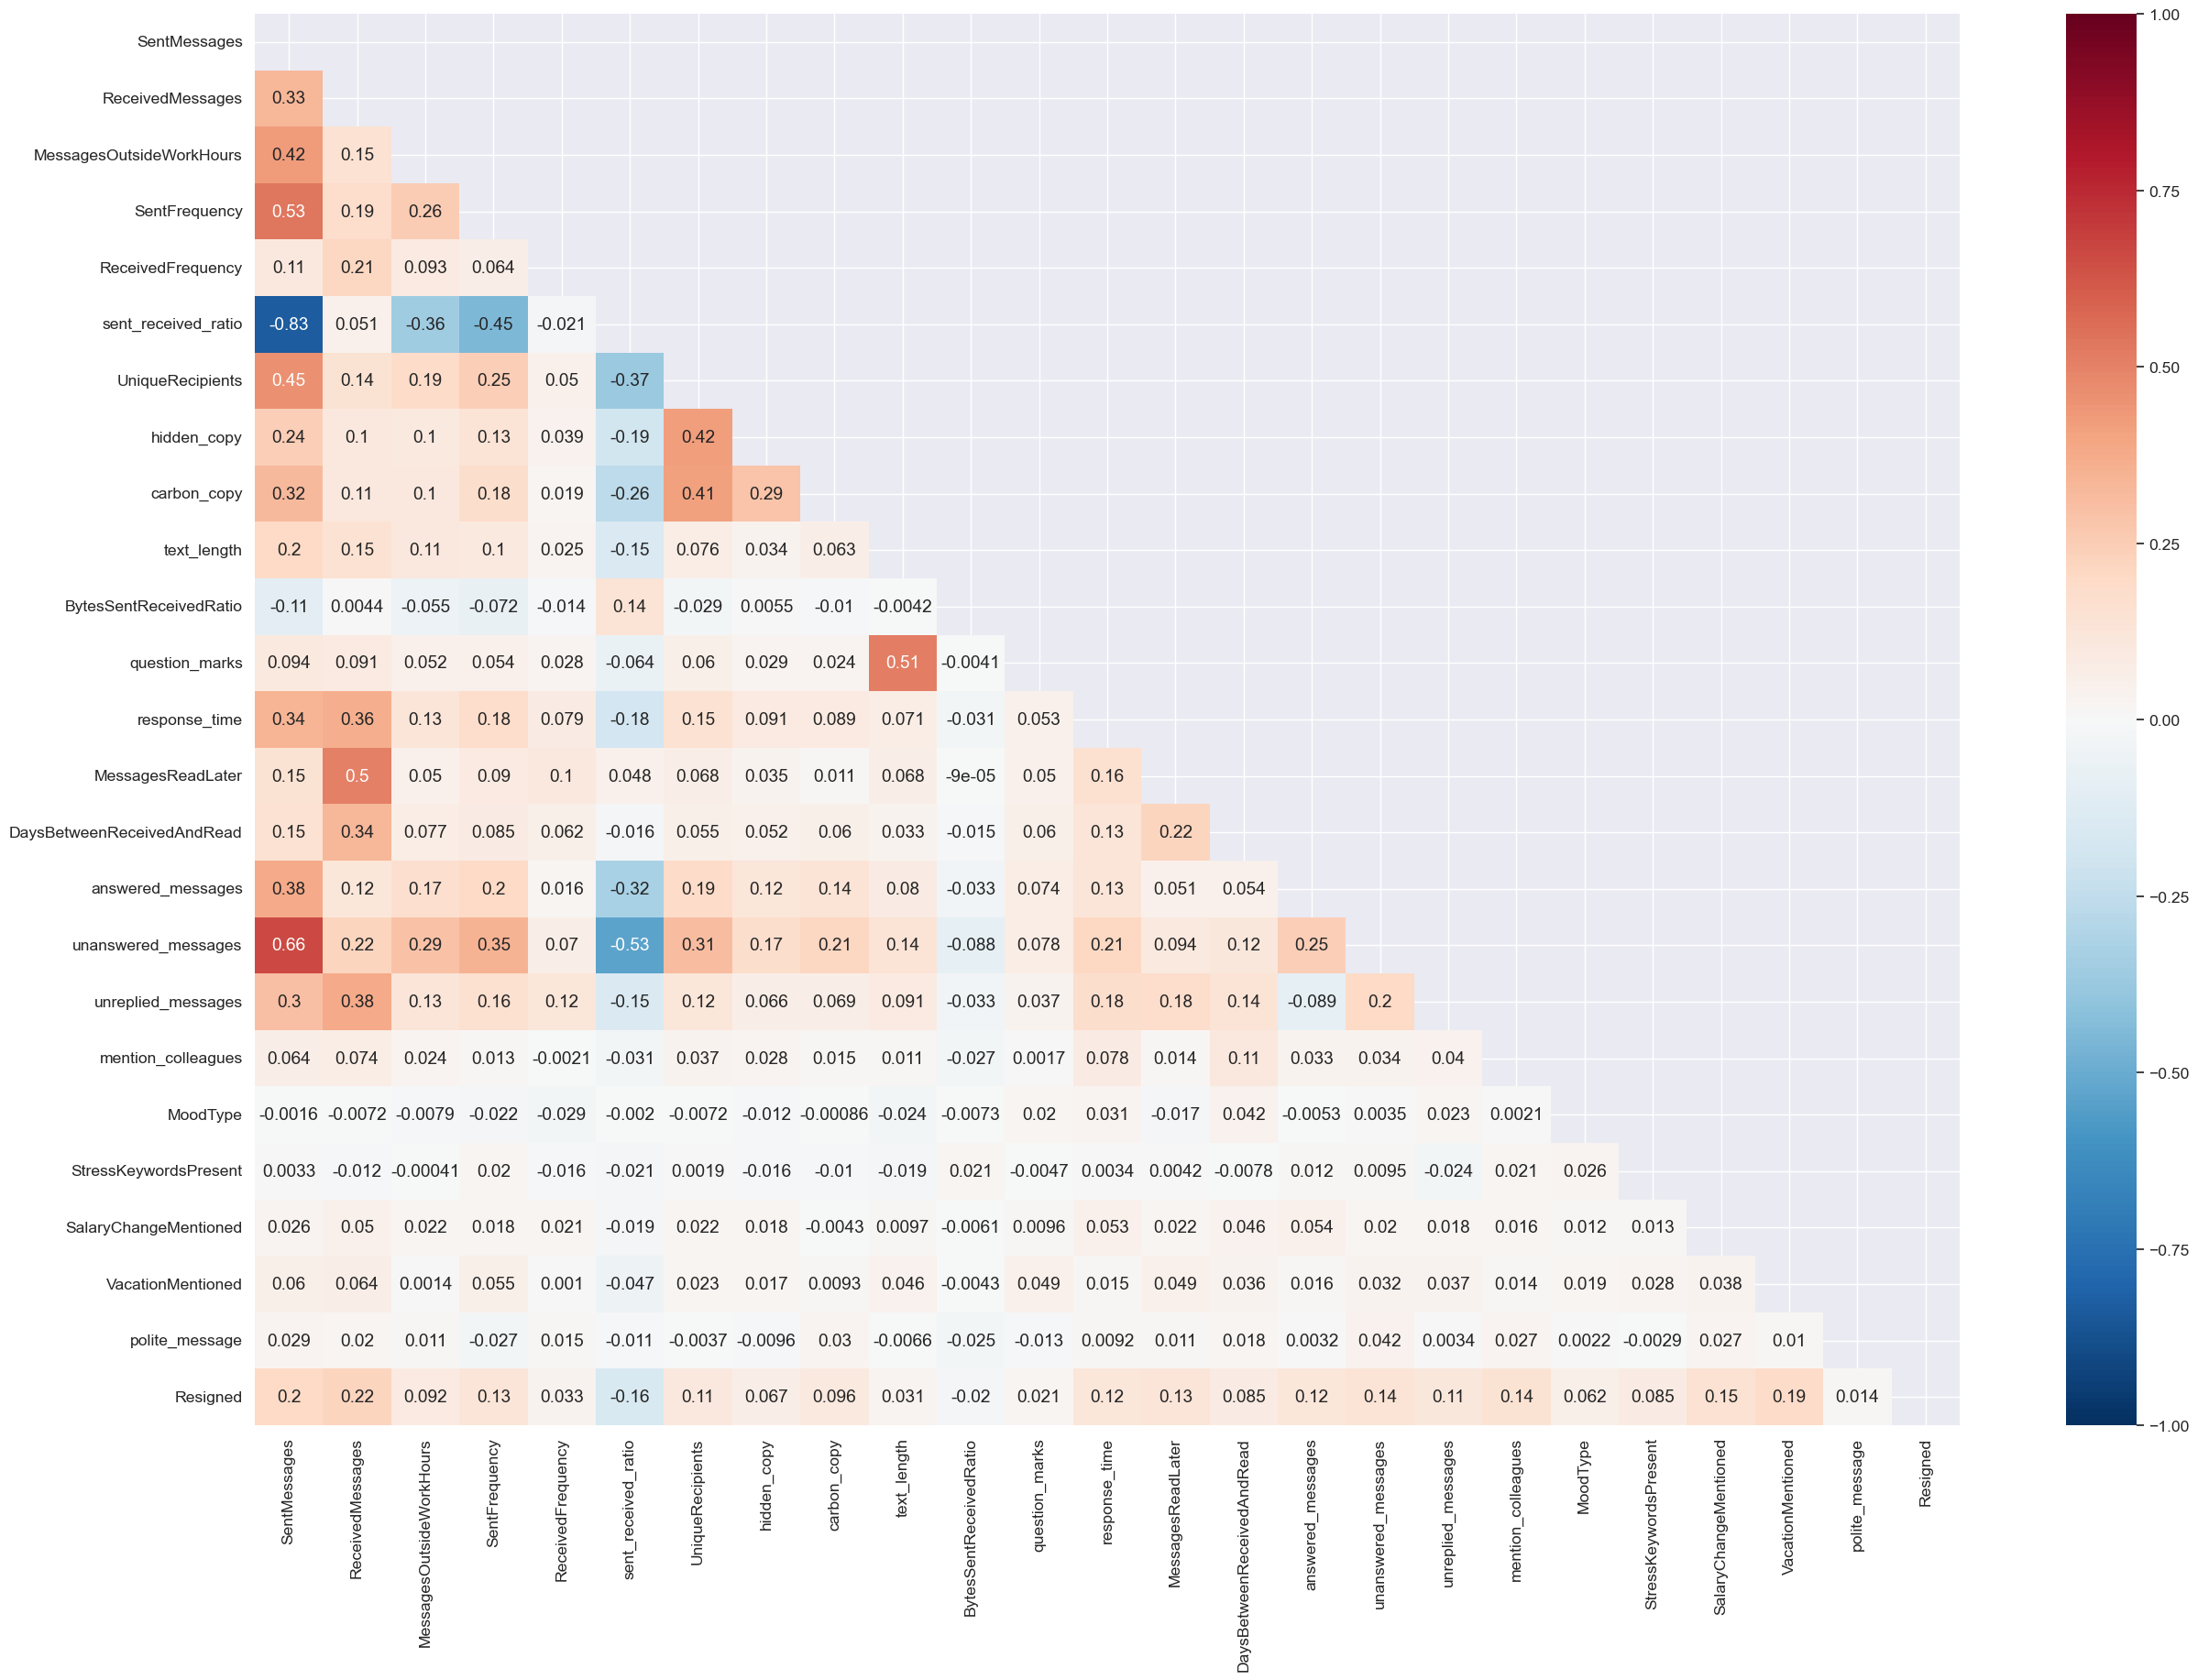

In [1033]:
# Проверим корреляции
correlation_matrix = df.drop(columns=['id']).corr()

plt.figure(figsize=(30,20))
sns.set(font_scale=1.15)
sns.heatmap(correlation_matrix,
            cmap='RdBu_r', # задаёт цветовую схему
            annot=True, # рисует значения внутри ячеек
            vmin=-1, vmax=1,
            mask=np.triu(correlation_matrix))

In [1034]:
# cols = ['mention_colleagues', 'MoodType', 'StressKeywordsPresent', 'SalaryChangeMentioned', 'VacationMentioned',  'polite_message',
#         'BytesSentReceivedRatio', 'question_marks']
# for col in cols:
#     print(df[col].value_counts())
#     # sns.displot(df, x=col, binwidth=3)
#     # plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'SentMessages'}>,
        <Axes: title={'center': 'ReceivedMessages'}>,
        <Axes: title={'center': 'MessagesOutsideWorkHours'}>,
        <Axes: title={'center': 'SentFrequency'}>],
       [<Axes: title={'center': 'ReceivedFrequency'}>,
        <Axes: title={'center': 'sent_received_ratio'}>,
        <Axes: title={'center': 'UniqueRecipients'}>,
        <Axes: title={'center': 'hidden_copy'}>,
        <Axes: title={'center': 'carbon_copy'}>],
       [<Axes: title={'center': 'text_length'}>,
        <Axes: title={'center': 'BytesSentReceivedRatio'}>,
        <Axes: title={'center': 'question_marks'}>,
        <Axes: title={'center': 'response_time'}>,
        <Axes: title={'center': 'MessagesReadLater'}>],
       [<Axes: title={'center': 'DaysBetweenReceivedAndRead'}>,
        <Axes: title={'center': 'answered_messages'}>,
        <Axes: title={'center': 'unanswered_messages'}>,
        <Axes: title={'center': '

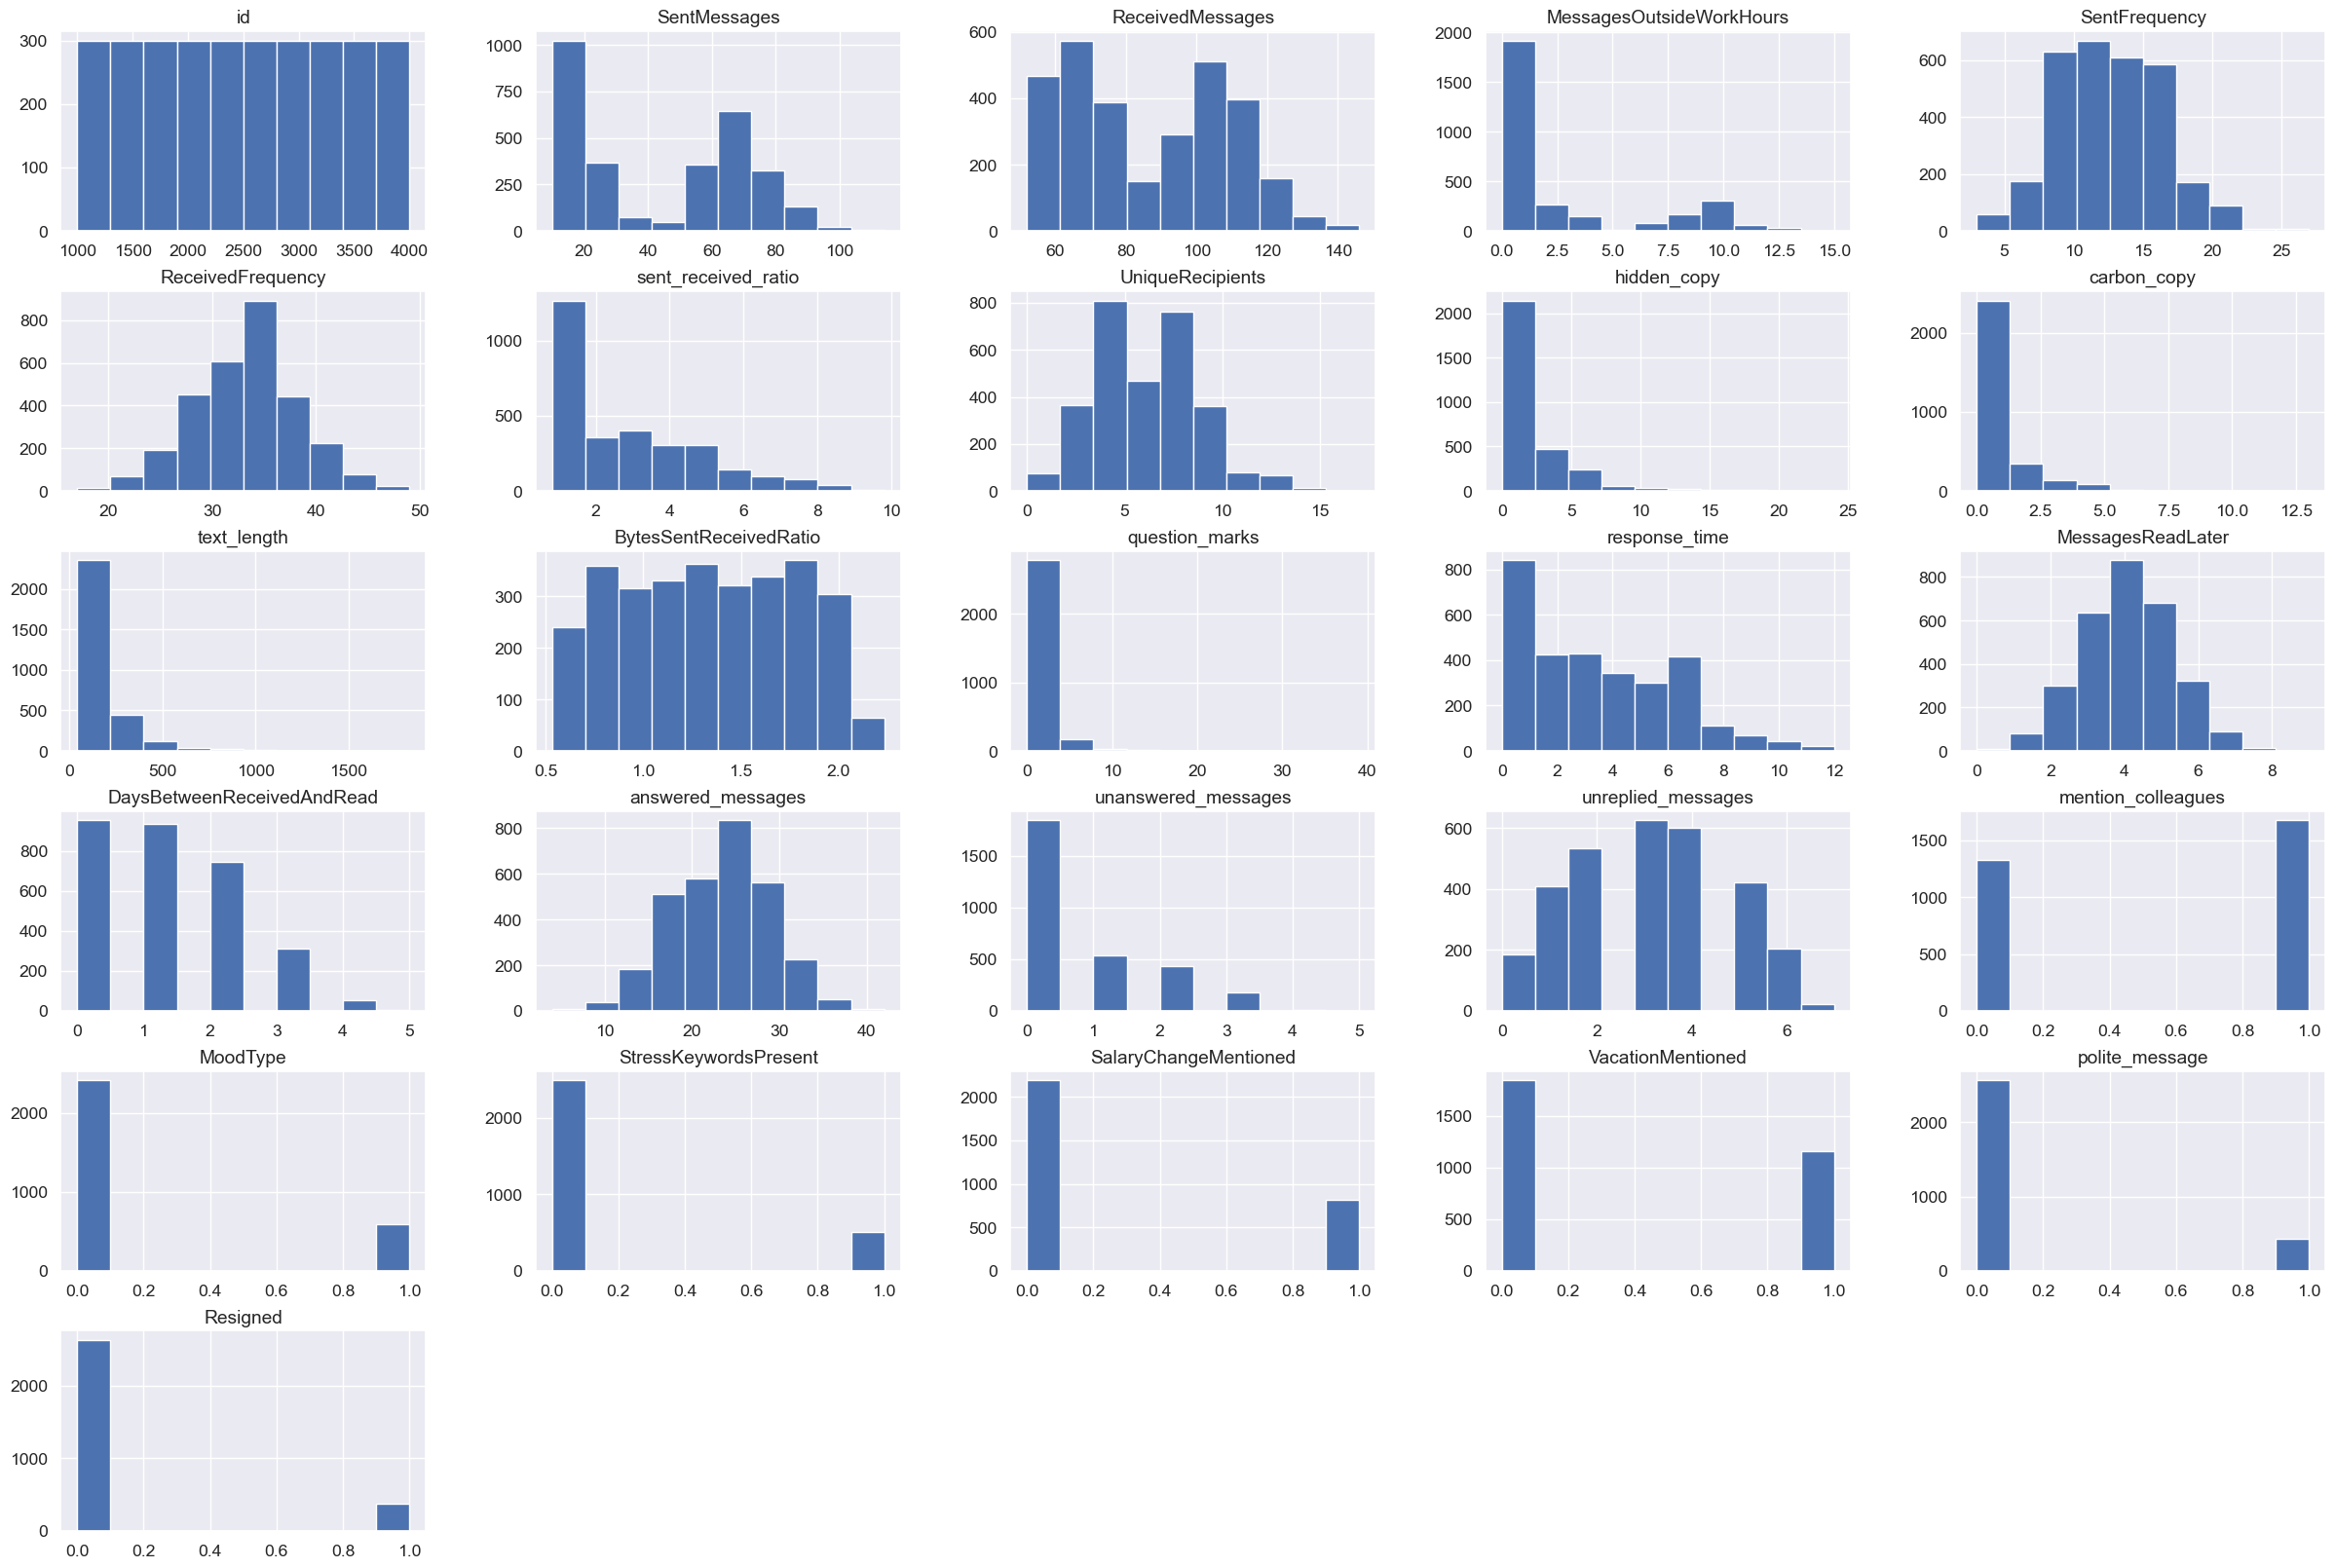

In [1035]:
df.hist(figsize=(30, 20))

In [1036]:
def rand_group(x):
    return random.randint(1, 5)

groups_to_replace = {1: 'Development Department', 2: 'Quality Assurance', 3: 'IT Infrastructure', 4: 'Sales and Marketing', 5: 'Research and Development'}

df['Group'] = 0
df['Group'] = df['Group'].apply(rand_group).replace(groups_to_replace)

In [1037]:
def rand_gender(x):
    return random.randint(1, 2)

groups_to_replace = {1: 'Male', 2: 'Female'}

df['Gender'] = 0
df['Gender'] = df['Gender'].apply(rand_gender).replace(groups_to_replace)

In [1038]:
import joblib

cols_to_drop = ['Group', 'Gender']
# Сохранение в файл
filename = f'../data/cols_to_drop'

joblib.dump(cols_to_drop, filename)

cols_full = list(df.columns)
# Сохранение в файл
filename = f'../data/cols_full'

joblib.dump(cols_full, filename)

['../data/cols_full']

In [1039]:
sample = df.sample(n=50, random_state=42).drop(columns=['Resigned'])
sample.to_csv('../data/test.csv')

df = df.drop(index=sample.index)
df.to_csv('../data/train.csv')